<a href="https://colab.research.google.com/github/steven202/EECE5644-exercises/blob/master/EECE_5644_exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this code is partially copied and modified from coursera. Here is the link: https://www.coursera.org/learn/neural-networks-deep-learning/notebook/zAgPl/logistic-regression-with-a-neural-network-mindset Many thanks for the authors.

The code is also in github:
https://github.com/steven202/EECE5644-exercises

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [0]:
p = np.array([[0.5,0.5]]);
m = 10000
np.random.seed(3)
y = np.where(np.reshape(np.random.random((1,m)), (m,1))>=p[0][0],1,0)
num0 = np.argwhere(y==0).shape[0];
num1 = np.argwhere(y==1).shape[0];

In [3]:
print(num0,num1);

5063 4937


In [0]:
m0 = np.array([-2,0]);
c0 = np.array([[1,0],[0,3]]); n0=num0;
x0 = np.random.multivariate_normal(m0,c0,n0);

In [0]:
m1 = np.array([2,0]);
c1 = np.array([[1,0],[0,3]]);n1=num1;
x1 = np.random.multivariate_normal(m1,c1,n1);

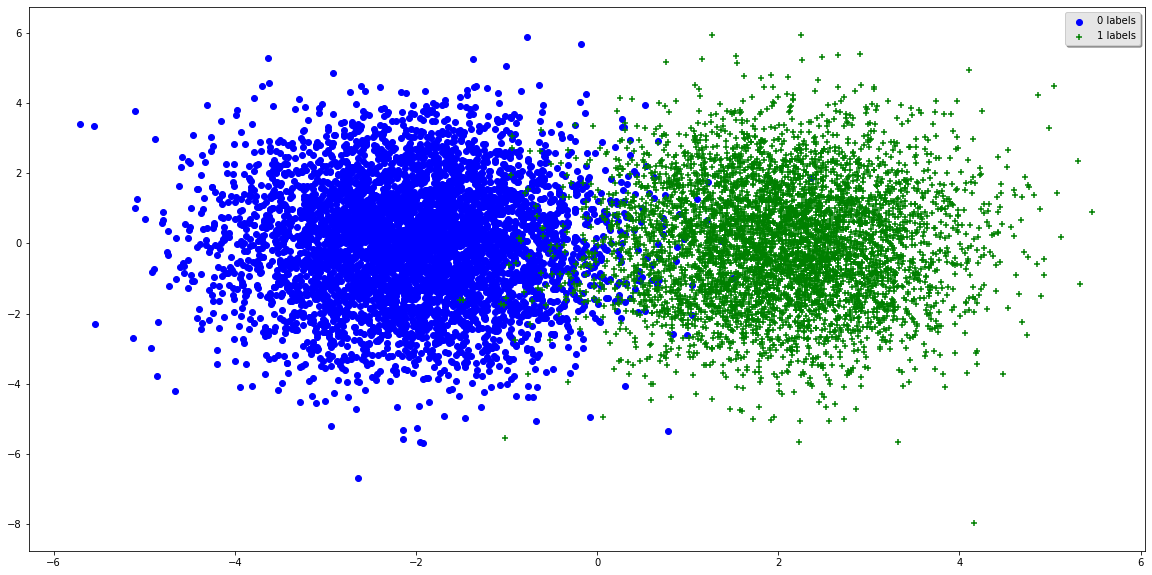

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(x0[:,0],x0[:,1],marker='o',color='b',label= str("0 labels"))
plt.scatter(x1[:,0],x1[:,1],marker='+',color='g',label= str("1 labels"))
legend = plt.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

General Architecture of the learning algorithm ##

I will build a Logistic Regression.

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
I will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

$sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [0]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))    
    return s

In [0]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    #################
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [9]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [10]:
lambda0 = np.ones((2,1));
print(lambda0)

[[1.]
 [1.]]


In [0]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X)+b)                                    # compute activation
    cost = -1/m*sum(np.squeeze(lambda0[0,0]*Y*np.log(A)+lambda0[1,0]*(1-Y)*np.log(1-A)))                                 # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1/m*(np.dot(X,(A-Y).T))
    db = 1/m*sum(np.squeeze(A-Y))
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [12]:
#test
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w-learning_rate*dw
        b = b-learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [14]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [0]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X)+b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[:,i] <= 0.5:
            A[:,i]=0
        else:
            A[:,i]=1
        ### END CODE HERE ###
    Y_prediction=A
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [16]:
#test
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [18]:
test_set_x = train_set_x = np.concatenate((x0, x1), axis=0).T;
test_set_y = train_set_y = np.concatenate((np.zeros((5000, 1)),np.ones((5000,1))), axis=0).T;
print(test_set_x.shape);
print(test_set_y.shape);

(2, 10000)
(1, 10000)


In [19]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.407010
Cost after iteration 200: 0.301415
Cost after iteration 300: 0.248975
Cost after iteration 400: 0.217824
Cost after iteration 500: 0.197188
Cost after iteration 600: 0.182501
Cost after iteration 700: 0.171506
Cost after iteration 800: 0.162961
Cost after iteration 900: 0.156129
Cost after iteration 1000: 0.150540
Cost after iteration 1100: 0.145884
Cost after iteration 1200: 0.141946
Cost after iteration 1300: 0.138572
Cost after iteration 1400: 0.135651
Cost after iteration 1500: 0.133098
Cost after iteration 1600: 0.130848
Cost after iteration 1700: 0.128851
Cost after iteration 1800: 0.127068
Cost after iteration 1900: 0.125467
train accuracy: 97.05 %
test accuracy: 97.05 %


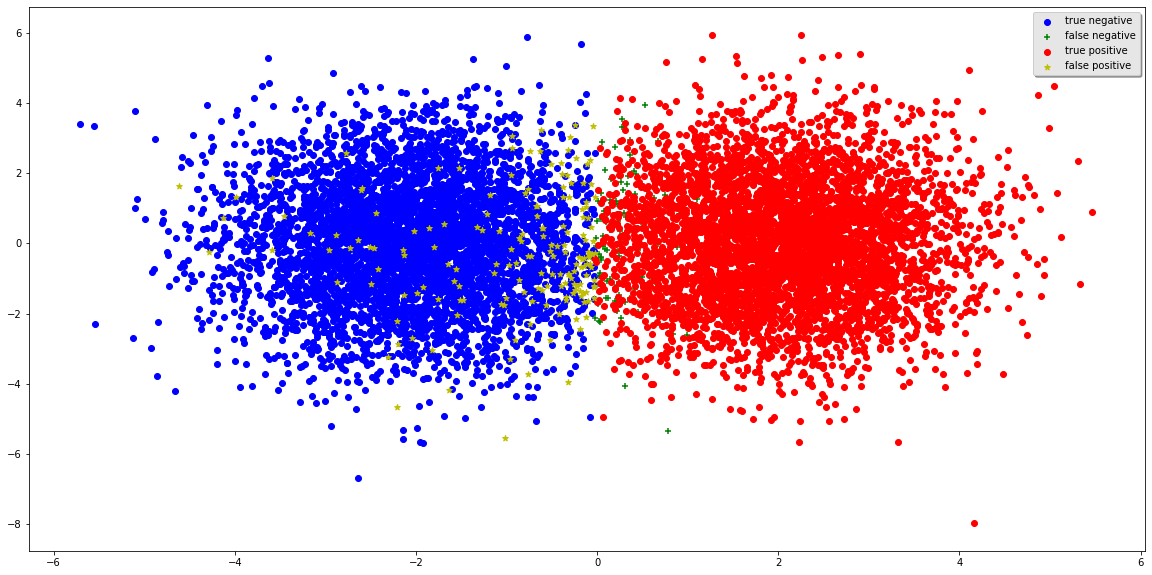

In [20]:
set1=set2=set3=set4=np.array([0,0])
plt.figure(figsize=(20,10))
for i in range(10000):
  if train_set_y[0,i]==0 and train_set_y[0,i]==d["Y_prediction_train"][0,i] :
    set1 = np.vstack((set1, [train_set_x[0,i],train_set_x[1,i]]))
  if train_set_y[0,i]==0 and train_set_y[0,i]!=d["Y_prediction_train"][0,i] :
    set2 = np.vstack((set2, [train_set_x[0,i],train_set_x[1,i]]))
  if train_set_y[0,i]==1 and train_set_y[0,i]==d["Y_prediction_train"][0,i] :
    set3 = np.vstack((set3, [train_set_x[0,i],train_set_x[1,i]]))
  if train_set_y[0,i]==1 and train_set_y[0,i]!=d["Y_prediction_train"][0,i] :
    set4 = np.vstack((set4, [train_set_x[0,i],train_set_x[1,i]]))
set1 = np.delete(set1, (0), axis=0)
set2 = np.delete(set2, (0), axis=0)
set3 = np.delete(set3, (0), axis=0)
set4 = np.delete(set4, (0), axis=0)
plt.scatter(set1[:,0],set1[:,1],marker='o',color='b', label=str("true negative"));
plt.scatter(set2[:,0],set2[:,1],marker='+',color='g', label=str("false negative"));
plt.scatter(set3[:,0],set3[:,1],marker='o',color='r', label=str("true positive"));
plt.scatter(set4[:,0],set4[:,1],marker='*',color='y', label=str("false positive"));

legend = plt.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [21]:
set1 = np.delete(set1, (0), axis=0)
set1

array([[-2.4209479 , -2.45636887],
       [-4.31697709, -0.03399146],
       [-2.88100317,  1.43485696],
       ...,
       [-2.56130145,  1.13330752],
       [-4.47717403, -1.06784635],
       [-2.56240948, -1.0981581 ]])

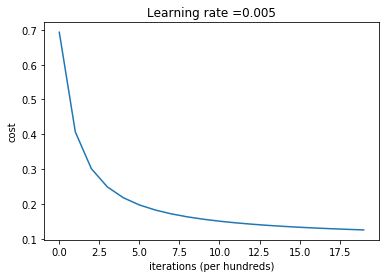

In [22]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 97.08 %
test accuracy: 97.08 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 97.07 %
test accuracy: 97.07 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 97.07 %
test accuracy: 97.07 %

-------------------------------------------------------



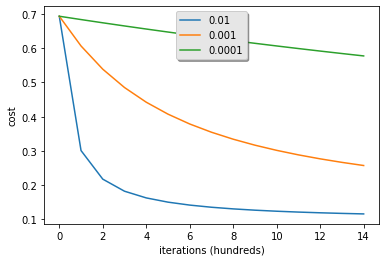

In [23]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [24]:
p = np.array([[0.5,0.5]]);
m = 10000
np.random.seed(1)
y = np.where(np.reshape(np.random.random((1,m)), (m,1))>=p[0][0],1,0)
num3 = np.argwhere(y==0).shape[0];
num4 = np.argwhere(y==1).shape[0];
print(num3, num4)

4990 5010


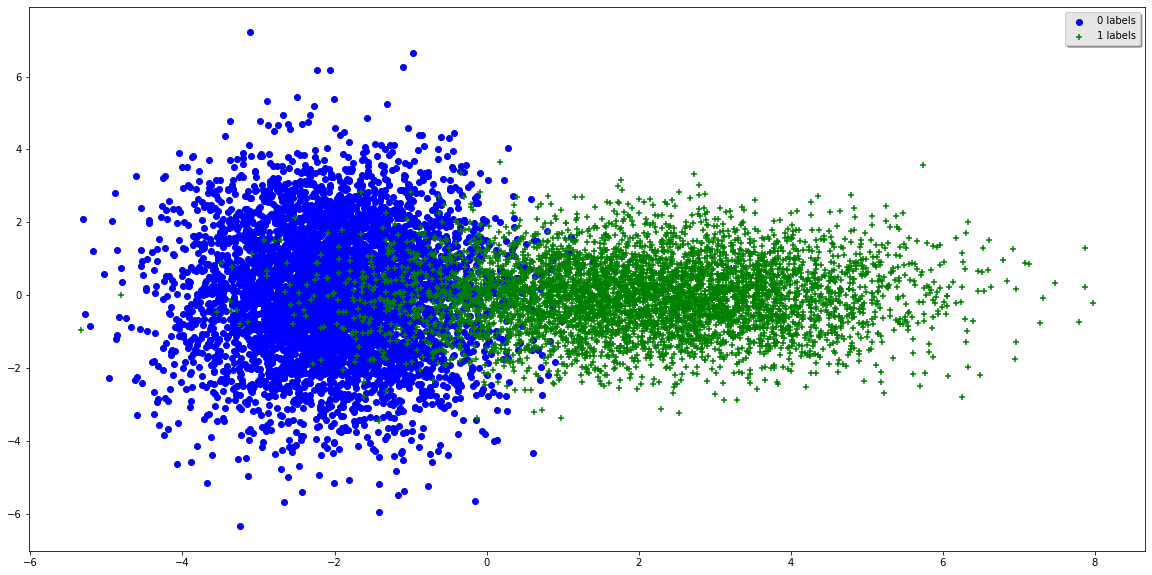

In [25]:
m3 = np.array([-2,0]);
c3 = np.array([[1,0],[0,3]]);n3=num3;
x3 = np.random.multivariate_normal(m3,c3,n3);
m4 = np.array([2,0]);
c4 = np.array([[3,0],[0,1]]);n4=num4;
x4 = np.random.multivariate_normal(m4,c4,n4);
plt.figure(figsize=(20,10))
plt.scatter(x3[:,0],x3[:,1],marker='o',color='b',label= str("0 labels"))
plt.scatter(x4[:,0],x4[:,1],marker='+',color='g',label= str("1 labels"))
legend = plt.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [26]:
test_set_x = train_set_x = np.concatenate((x3, x4), axis=0).T;
test_set_y = train_set_y = np.concatenate((np.zeros((5000, 1)),np.ones((5000,1))), axis=0).T;
print(test_set_x.shape);
print(test_set_y.shape);
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

(2, 10000)
(1, 10000)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.424923
Cost after iteration 200: 0.336864
Cost after iteration 300: 0.294925
Cost after iteration 400: 0.270580
Cost after iteration 500: 0.254723
Cost after iteration 600: 0.243592
Cost after iteration 700: 0.235357
Cost after iteration 800: 0.229024
Cost after iteration 900: 0.224004
Cost after iteration 1000: 0.219930
Cost after iteration 1100: 0.216558
Cost after iteration 1200: 0.213721
Cost after iteration 1300: 0.211302
Cost after iteration 1400: 0.209214
Cost after iteration 1500: 0.207395
Cost after iteration 1600: 0.205795
Cost after iteration 1700: 0.204377
Cost after iteration 1800: 0.203112
Cost after iteration 1900: 0.201977
train accuracy: 92.99 %
test accuracy: 92.99 %


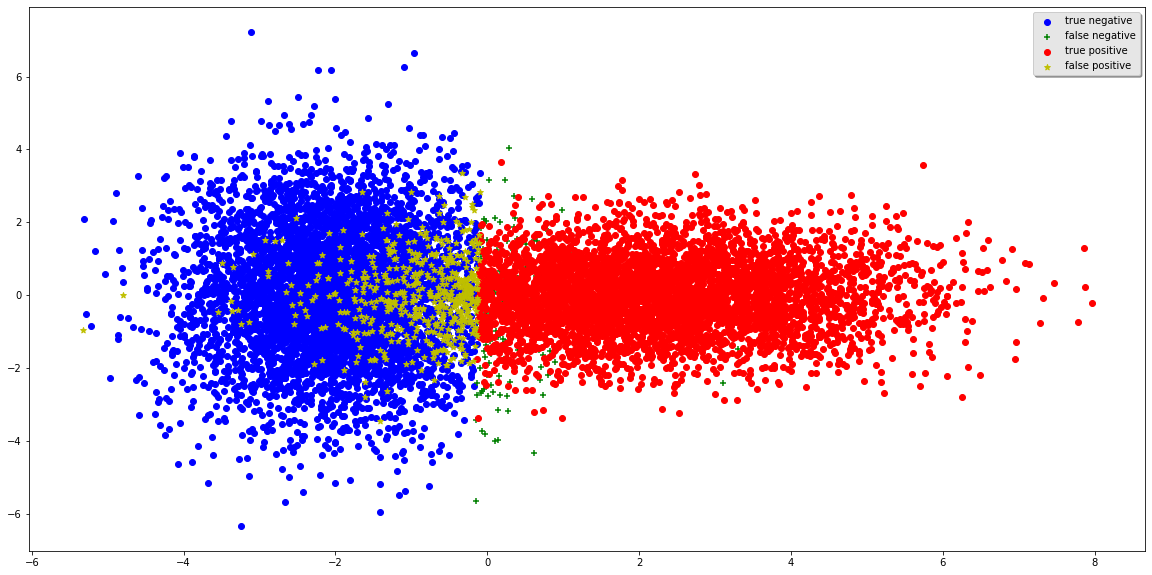

In [27]:
set1=set2=set3=set4=np.array([0,0])
plt.figure(figsize=(20,10))
for i in range(10000):
  if train_set_y[0,i]==0 and train_set_y[0,i]==d["Y_prediction_train"][0,i] :
    set1 = np.vstack((set1, [train_set_x[0,i],train_set_x[1,i]]))
  if train_set_y[0,i]==0 and train_set_y[0,i]!=d["Y_prediction_train"][0,i] :
    set2 = np.vstack((set2, [train_set_x[0,i],train_set_x[1,i]]))
  if train_set_y[0,i]==1 and train_set_y[0,i]==d["Y_prediction_train"][0,i] :
    set3 = np.vstack((set3, [train_set_x[0,i],train_set_x[1,i]]))
  if train_set_y[0,i]==1 and train_set_y[0,i]!=d["Y_prediction_train"][0,i] :
    set4 = np.vstack((set4, [train_set_x[0,i],train_set_x[1,i]]))
set1 = np.delete(set1, (0), axis=0)
set2 = np.delete(set2, (0), axis=0)
set3 = np.delete(set3, (0), axis=0)
set4 = np.delete(set4, (0), axis=0)
plt.scatter(set1[:,0],set1[:,1],marker='o',color='b', label=str("true negative"));
plt.scatter(set2[:,0],set2[:,1],marker='+',color='g', label=str("false negative"));
plt.scatter(set3[:,0],set3[:,1],marker='o',color='r', label=str("true positive"));
plt.scatter(set4[:,0],set4[:,1],marker='*',color='y', label=str("false positive"));

legend = plt.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

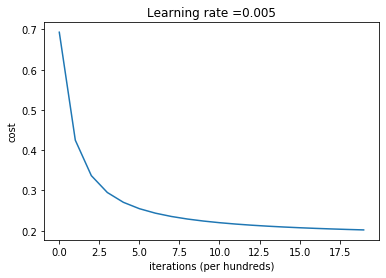

In [28]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()